## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Visualización de los datos

---

En esta libreta se generan los modelos de visualización (gráficos) sobre los datasets 
del escenario para su posterior integración en la herramienta a utilizar. 

---

In [1]:
# Importación de librerías

import pandas as pd
# En esta línea se podría producir un error, se debe instalar plotly
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

----

##### Lectura del dataset

In [2]:
df = pd.read_csv("../../../data/final/datos_finales.csv", sep=";")
df.head(5)

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil_N,estado_credito_N,estado_cliente_N,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,genero,nivel_educativo,personas_a_cargo
0,30_a_50,2k_a_4k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_0.18,4_a_9,menor_24,C,C,1,1000,2,PROPIA,EDUCACIÓN,N,M,SECUNDARIO_COMPLETO,3.0
1,15_a_30,2k_a_4k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,0.39_a_0.59,4_a_9,menor_24,C,P,1,35000,2,ALQUILER,SALUD,N,M,UNIVERSITARIO_COMPLETO,3.0
2,15_a_30,2k_a_4k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,0.39_a_0.59,4_a_9,menor_24,C,P,1,35000,4,ALQUILER,SALUD,Y,M,DESCONOCIDO,1.0
3,15_a_30,2k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,0.19_a_0.38,menor_4,menor_24,N,P,1,2500,2,PROPIA,INVERSIONES,N,F,SECUNDARIO_COMPLETO,4.0
4,15_a_30,menor_1k,3k_a_5k,menor_2y,7p_a_15p,50k_a_100k,0.39_a_0.59,4_a_9,mayor_24,C,P,1,35000,3,ALQUILER,EDUCACIÓN,N,M,UNIVERSITARIO_INCOMPLETO,3.0


----

##### Definición de gráficos de interés

In [3]:
# Cantidad de créditos por objetivo del mismo

creditos_x_objetivo = px.histogram(df, x='objetivo_credito', 
                                   title='Conteo de créditos por objetivo')
creditos_x_objetivo.update_layout(xaxis_title='Objetivo del crédito', yaxis_title='Cantidad')

In [4]:
# Histograma de los importes de créditos otorgados

histograma_importes = px.histogram(df, x='importe_solicitado', nbins=10, title='Importes solicitados en créditos')
histograma_importes.update_layout(xaxis_title='Importe solicitado', yaxis_title='Cantidad')

In [5]:
# Conteo de ocurrencias por estado
estado_credito_counts = df['estado_credito_N'].value_counts()

# Gráfico de torta de estos valores
fig = go.Figure(data=[go.Pie(labels=estado_credito_counts.index, values=estado_credito_counts)])
fig.update_layout(title_text='Distribución de créditos por estado registrado')
fig.show()

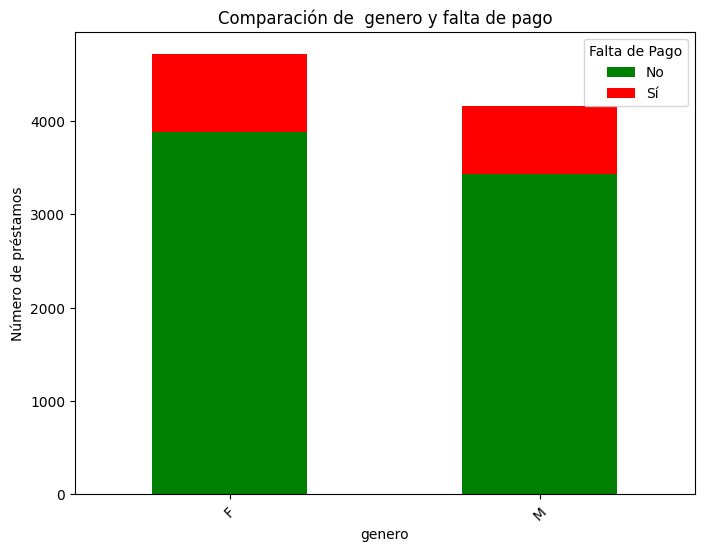

In [16]:
# 3. Comparación de estado civil y falta de pago (gráfico de barras apiladas)
status_vs_default = pd.crosstab(df['genero'], df['falta_pago'])
status_vs_default.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))
plt.title('Comparación de  genero y falta de pago')
plt.xlabel('genero')
plt.ylabel('Número de préstamos')
plt.xticks(rotation=45)
plt.legend(title='Falta de Pago', labels=['No', 'Sí'])
plt.show()


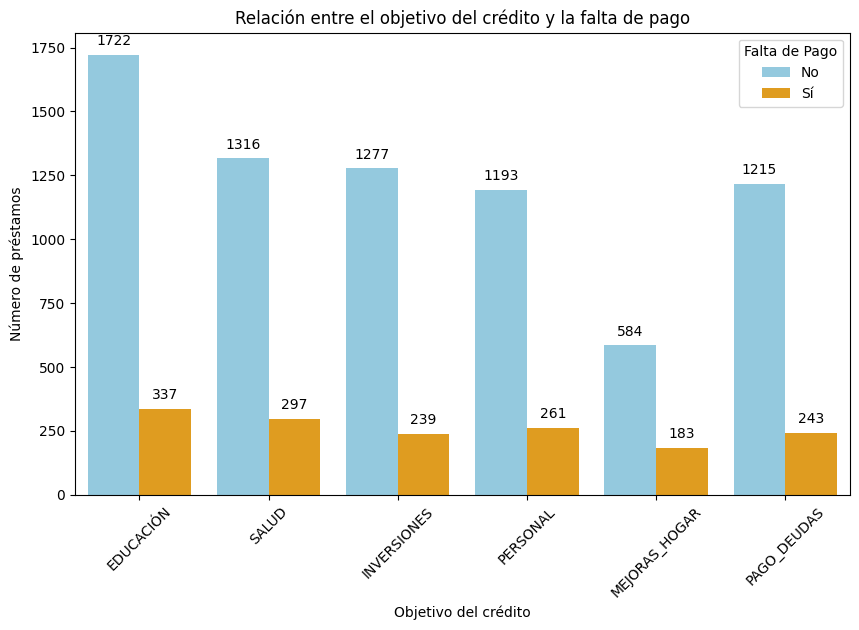

In [8]:
# Gráfico : Relación entre el objetivo del crédito y la falta de pago
custom_colors = {'N': 'skyblue', 'Y': 'orange'}

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='objetivo_credito', hue='falta_pago', data=df, palette=custom_colors)

# Agregar conteo redondeado en la parte superior de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Relación entre el objetivo del crédito y la falta de pago')
plt.xlabel('Objetivo del crédito')
plt.ylabel('Número de préstamos')
plt.xticks(rotation=45)
plt.legend(title='Falta de Pago', labels=['No', 'Sí'])
plt.show()

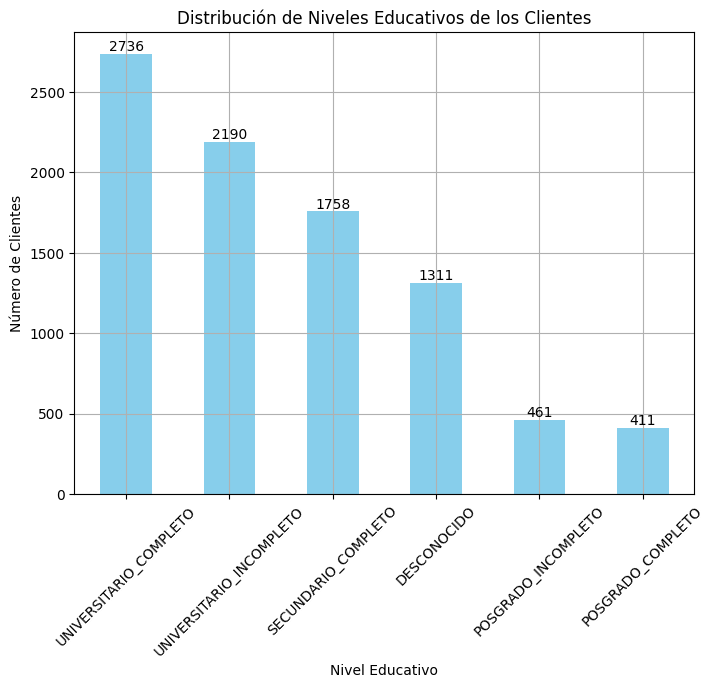

In [20]:
conteo_nivel_educativo = df['nivel_educativo'].value_counts()

# Crear el gráfico de barras de la distribución de niveles educativos
plt.figure(figsize=(8, 6))
grafico = conteo_nivel_educativo.plot(kind='bar', color='skyblue')

# Agregar el conteo encima de cada barra
for indice, valor in enumerate(conteo_nivel_educativo):
    plt.text(indice, valor + 0.1, str(valor), ha='center', va='bottom')

plt.title('Distribución de Niveles Educativos de los Clientes')
plt.xlabel('Nivel Educativo')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()